In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import os
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(1, parentdir+'/src')
import torch
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import time

In [36]:
import gym
import stage.envs
from stage.tasks.kuka import KukaPETS
from stage.utils.nn import use_gpu

In [37]:
savepath = parentdir + '/data/kuka/'

In [40]:
x = np.arange(0,10,0.01)
y = np.exp(-0.9*x)

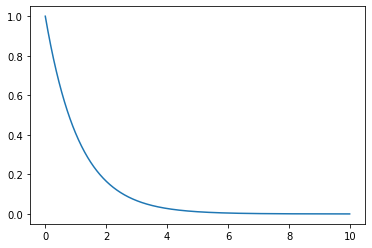

In [41]:
plt.plot(x, y)

In [5]:
data_train = np.load(savepath+'data_pd_reg.npy')
kuka = KukaPETS(render=True, 
                action_parameterization='pd')
kuka.visualize_training_data(data_train, it_begin=0)
q = kuka.env.step_cost.desired.detach().cpu().numpy()
v = np.zeros(7)
kuka.env.set_state(q, v)

In [6]:
kuka.env.close()